In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy import stats
from scipy.stats import norm, skew
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [3]:
Train = pd.read_csv('train_house.csv')

In [4]:
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
Train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [6]:
Train.isnull().sum().sum()

6965

In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
Test = pd.read_csv('test_house.csv')

In [9]:
Test.isna().sum().sum()

7000

In [10]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

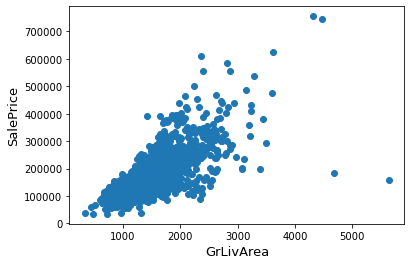

In [12]:
fig,ax = plt.subplots()
ax.scatter(x = Train['GrLivArea'], y = Train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

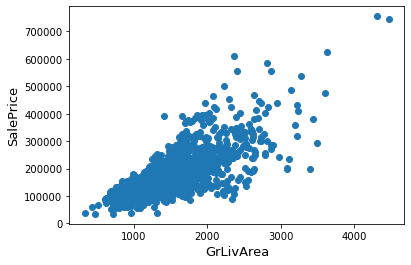

In [13]:
Train = Train.drop(Train[(Train['GrLivArea']>4000) &(Train['SalePrice']<300000)].index)
fig, ax = plt.subplots()
ax.scatter(Train['GrLivArea'], Train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

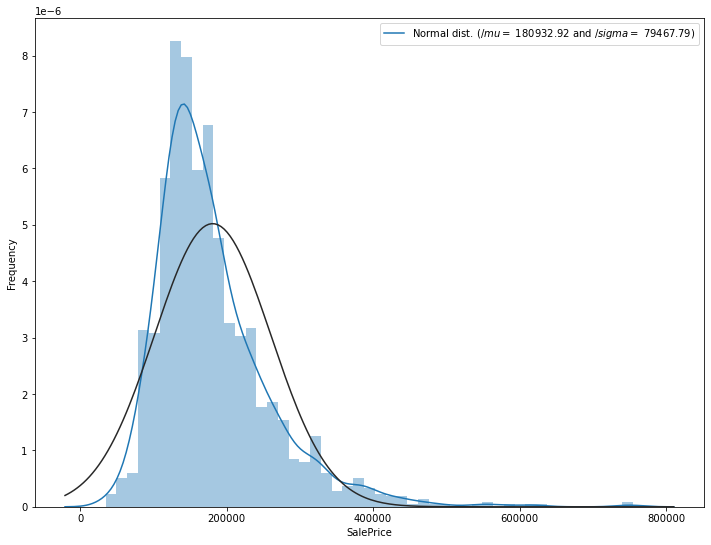

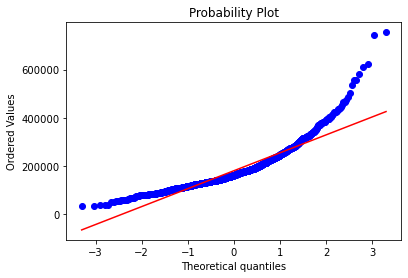

In [14]:
#Target vaiable 
plt.subplots(figsize=(12,9))
sns.distplot(Train['SalePrice'], fit=stats.norm)
#get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(Train['SalePrice'])
#Plot with the distribution 
plt.legend(['Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
# Probabilty plot
fig = plt.figure()
stats.probplot(Train['SalePrice'], plot=plt)
plt.show()


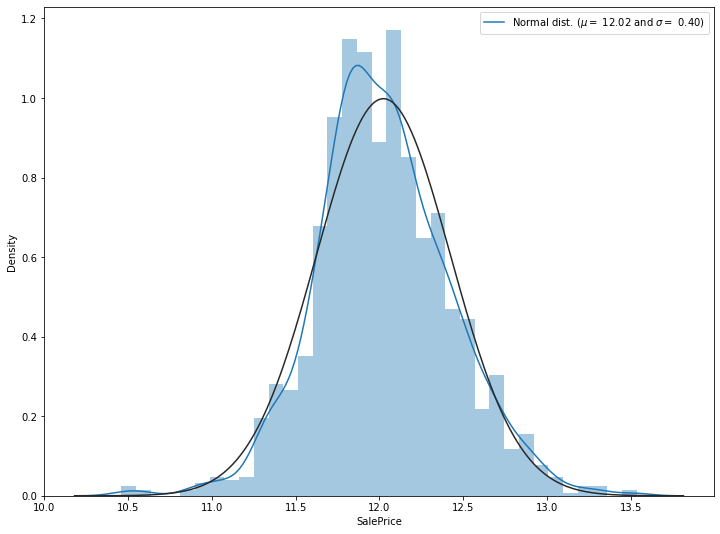

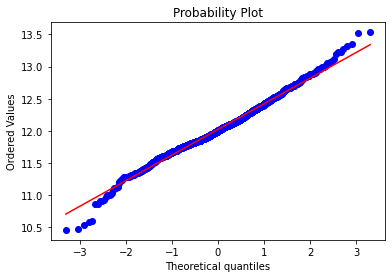

In [15]:
Train['SalePrice'] = np.log1p(Train['SalePrice'])
#check again for more normal distribution 
plt.subplots(figsize = (12,9))
sns.distplot(Train['SalePrice'], fit = stats.norm)
#get the fitted pararmeters used by the function
(mu, sigma) = stats.norm.fit(Train['SalePrice'])
#plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc='best')
#prob plot
fig=plt.figure()
stats.probplot(Train['SalePrice'], plot=plt)
plt.show()

In [16]:
# check the missing values
Train.columns[Train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

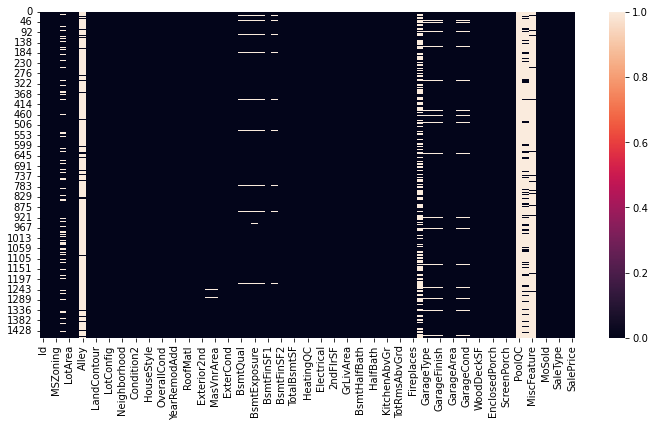

In [17]:
plt.figure(figsize= (12,6))
sns.heatmap(Train.isnull())
plt.show()

In [18]:
Isnull = Train.isnull().sum()/len(Train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending= False)
Isnull

PoolQC         99.588
MiscFeature    96.296
Alley          93.759
Fence          80.727
FireplaceQu    47.325
LotFrontage    17.764
GarageType      5.556
GarageYrBlt     5.556
GarageFinish    5.556
GarageQual      5.556
GarageCond      5.556
BsmtExposure    2.606
BsmtFinType2    2.606
BsmtFinType1    2.538
BsmtCond        2.538
BsmtQual        2.538
MasVnrArea      0.549
MasVnrType      0.549
Electrical      0.069
dtype: float64

In [19]:
Isnull = Isnull.to_frame()

In [20]:
Isnull.columns = ['count']

In [21]:
Isnull.index.names = ['Names']

In [22]:
Isnull['Name']= Isnull.index

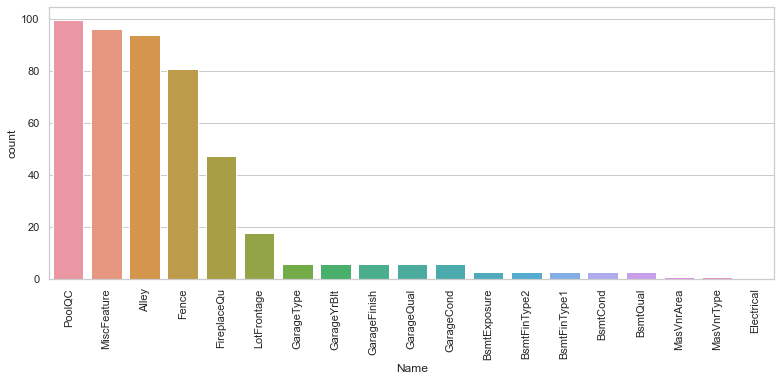

In [23]:
plt.figure(figsize=(13,5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation=90)
plt.show()

In [24]:
Train_corr = Train.select_dtypes(include= [np.number])

In [25]:
Train_corr.shape

(1458, 38)

In [26]:
del Train_corr['Id']

<AxesSubplot:>

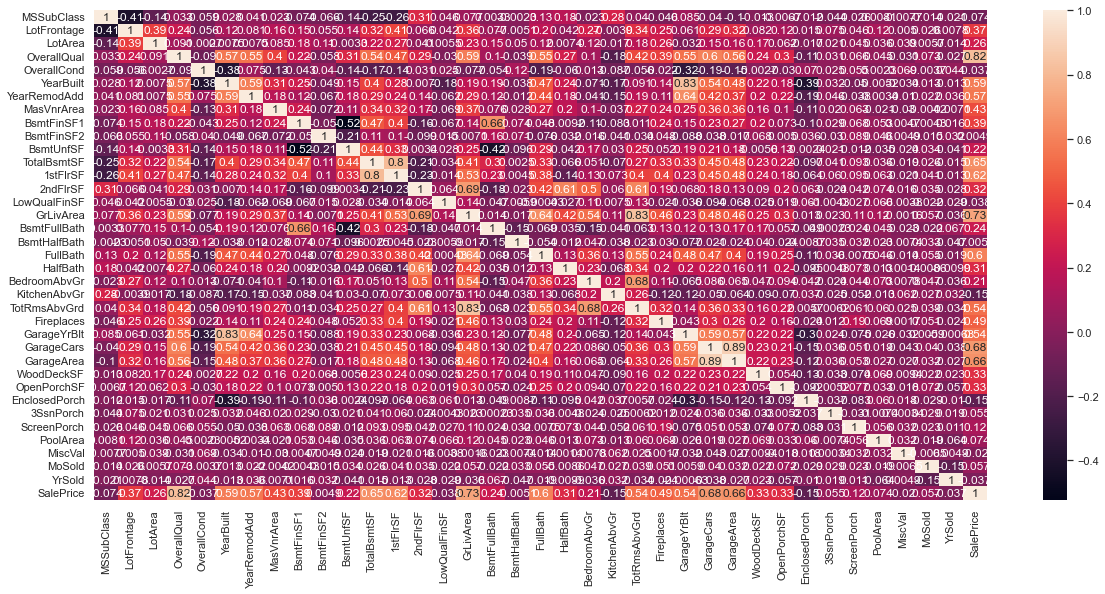

In [27]:
corr = Train_corr.corr()
plt.subplots(figsize= (20,9))
sns.heatmap(corr, annot=True)

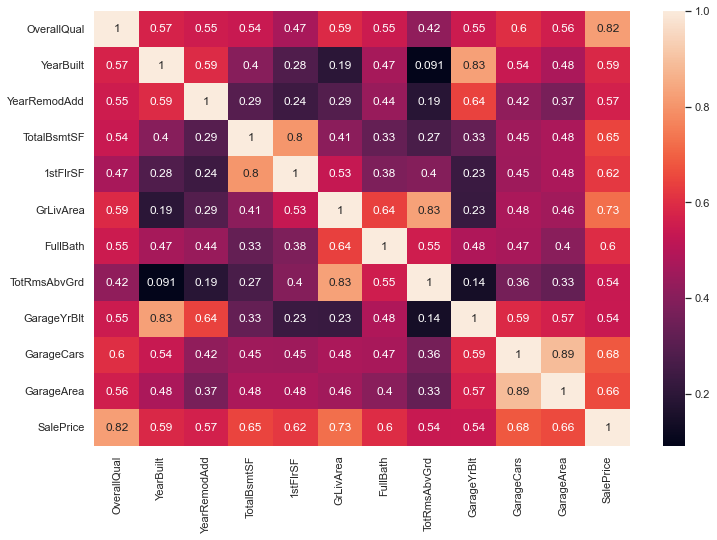

In [28]:
top_features = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize= (12,8))
top_corr = Train[top_features].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [29]:
Train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

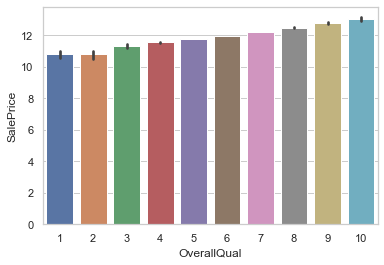

In [30]:
sns.barplot(Train.OverallQual, Train.SalePrice)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

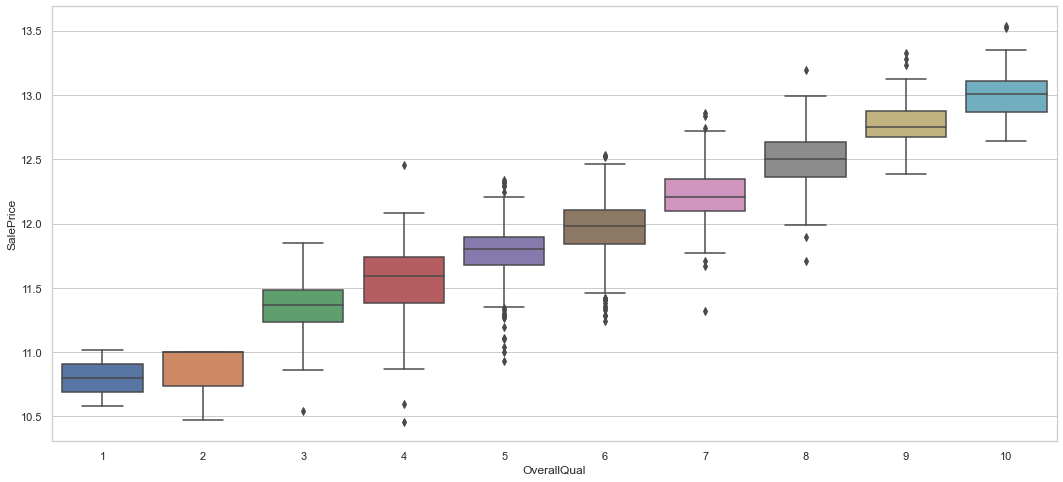

In [31]:
plt.figure(figsize=(18,8))
sns.boxplot(x=Train.OverallQual, y=Train.SalePrice)

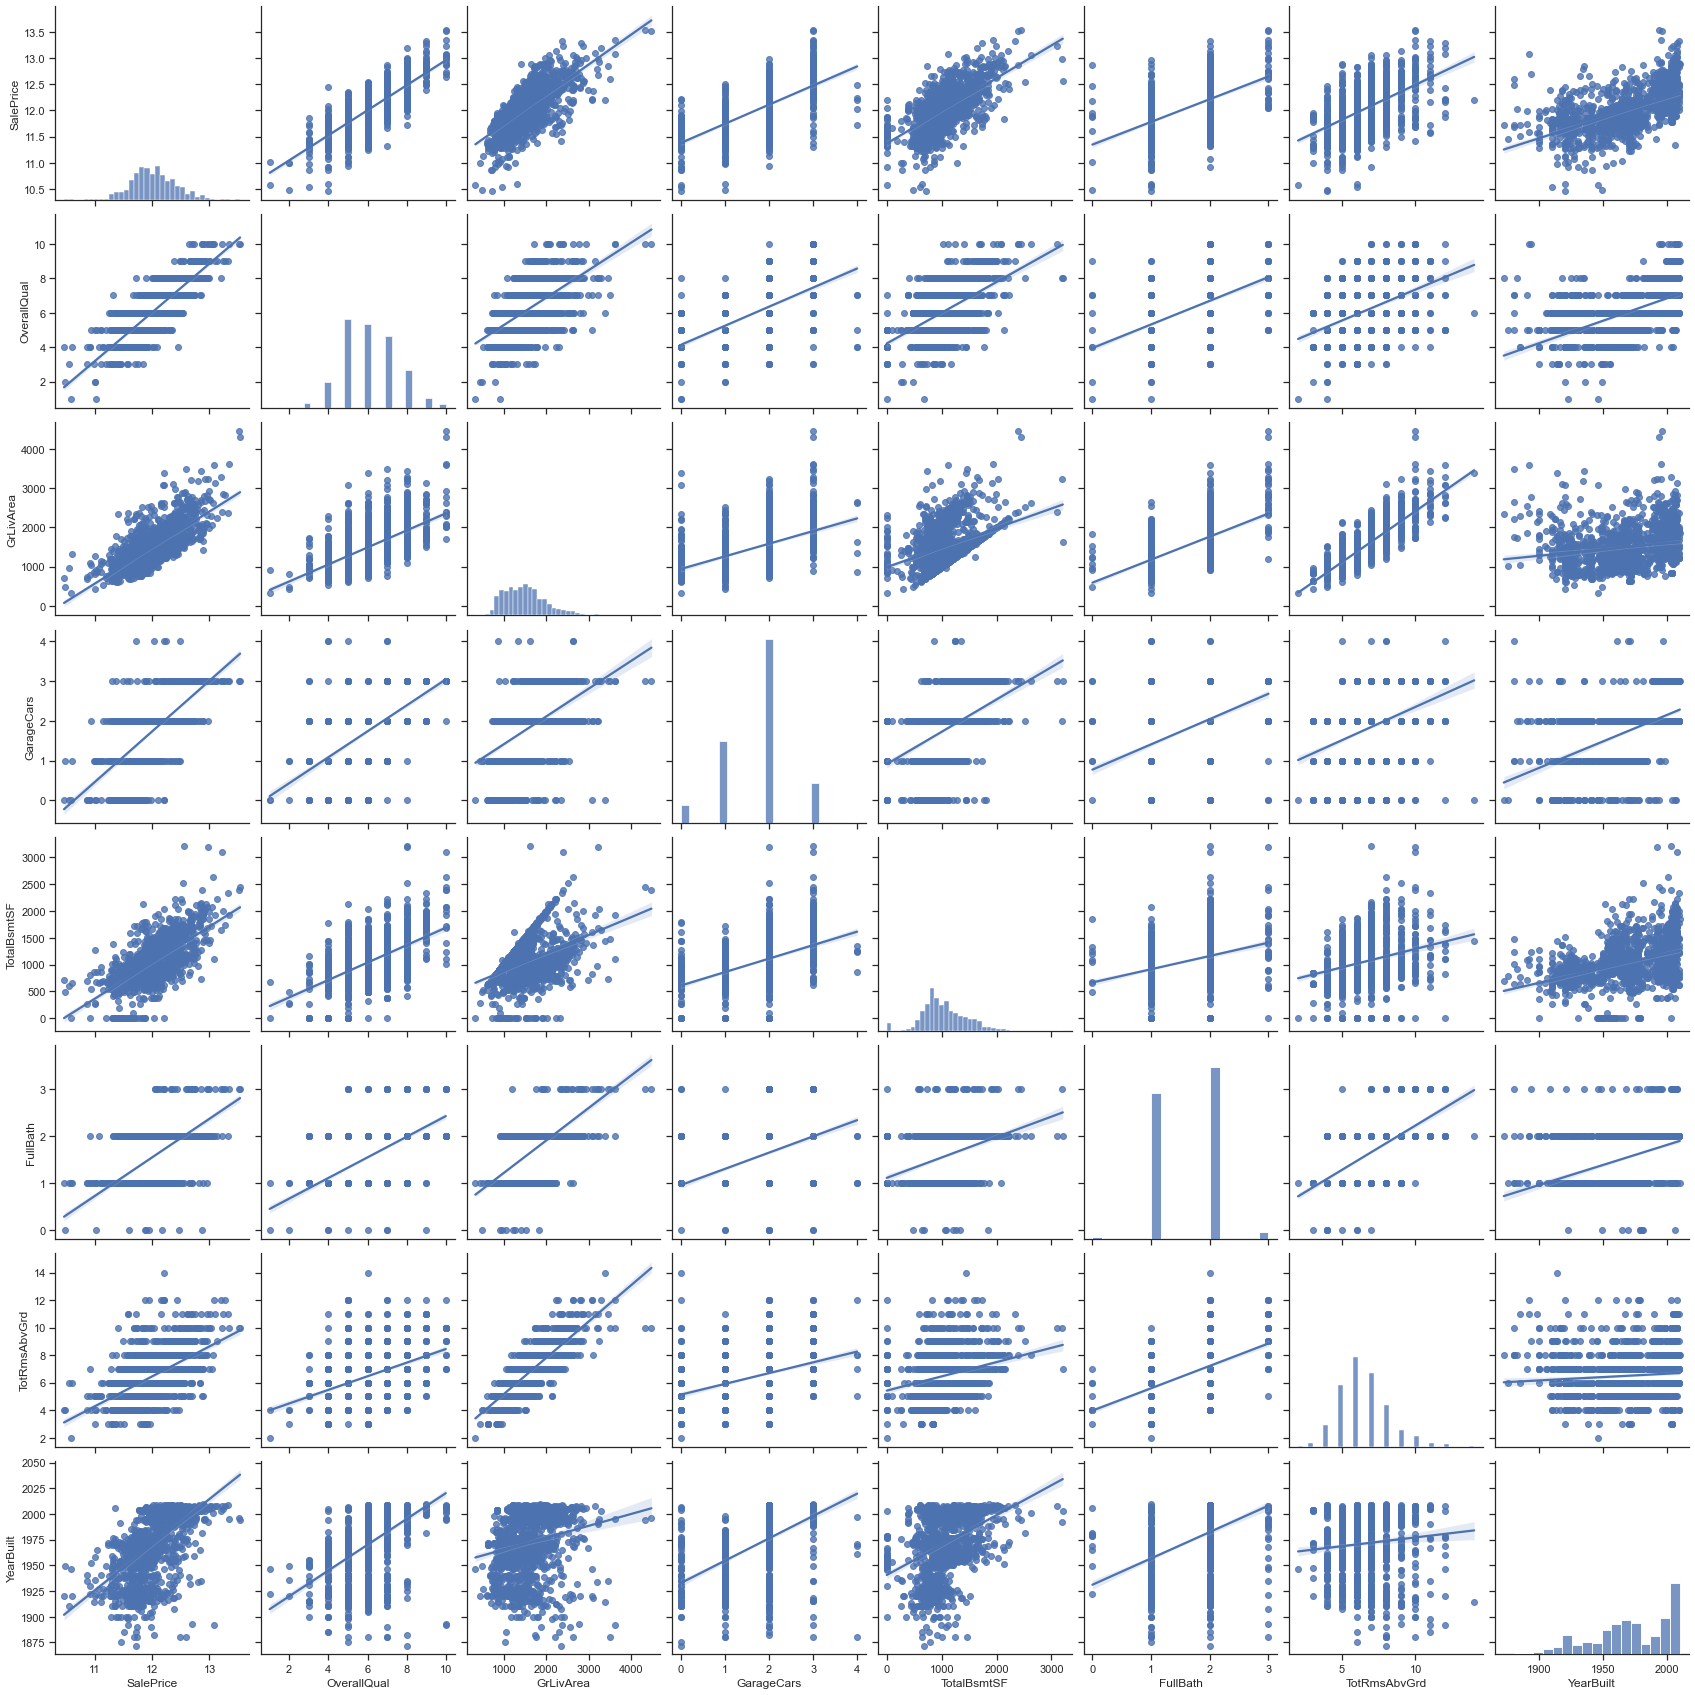

In [32]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style= 'ticks')
sns.pairplot(Train[col],height=3, kind='reg')

In [33]:
print("Find the most importance features relative to target")
corr = Train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace= True)
corr.SalePrice

Find the most importance features relative to target


SalePrice        1.000
OverallQual      0.821
GrLivArea        0.725
GarageCars       0.681
GarageArea       0.656
TotalBsmtSF      0.648
1stFlrSF         0.621
FullBath         0.596
YearBuilt        0.587
YearRemodAdd     0.566
GarageYrBlt      0.542
TotRmsAbvGrd     0.538
Fireplaces       0.492
MasVnrArea       0.435
BsmtFinSF1       0.392
LotFrontage      0.373
WoodDeckSF       0.334
OpenPorchSF      0.325
2ndFlrSF         0.320
HalfBath         0.314
LotArea          0.261
BsmtFullBath     0.237
BsmtUnfSF        0.222
BedroomAbvGr     0.209
ScreenPorch      0.121
PoolArea         0.074
MoSold           0.057
3SsnPorch        0.055
BsmtFinSF2       0.005
BsmtHalfBath    -0.005
Id              -0.018
MiscVal         -0.020
OverallCond     -0.037
YrSold          -0.037
LowQualFinSF    -0.038
MSSubClass      -0.074
KitchenAbvGr    -0.148
EnclosedPorch   -0.149
Name: SalePrice, dtype: float64

<AxesSubplot:>

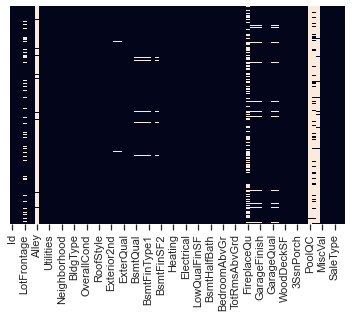

In [34]:
sns.heatmap(Train.isnull(),yticklabels=False,cbar=False)

In [35]:
Train = Train.drop(Train[(Train['GrLivArea']>4000) & (Train['SalePrice']<300000)].index)


In [36]:
#Feature engineering in this we concatenate the Train and test data in the same dataframe
nTrain = Train.shape[0]
nTest = Test.shape[0]
y_Train = Train.SalePrice.values
all_data = pd.concat((Train, Test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2915, 80)


In [37]:
#Missing data seeing missing data in terms of ratio
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)


,Missing Ratio
PoolQC,99.726
MiscFeature,96.398
Alley,93.208
Fence,80.446
FireplaceQu,48.714
LotFrontage,16.672
GarageFinish,5.455
GarageQual,5.455
GarageCond,5.455
GarageYrBlt,5.455


Text(0.5, 1.0, 'Percent missing data by feature')

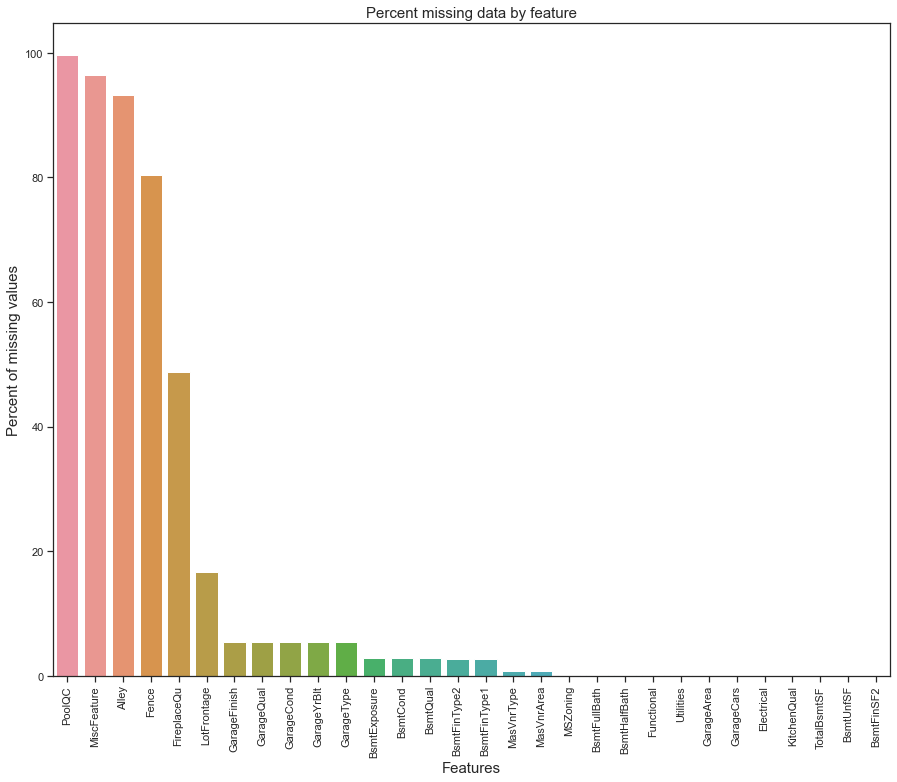

In [38]:
# see missing data on a plot
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [39]:
#inputing missing values 
#PoolQc if it na means no pool and as we can see barplot that most of the house in general do not have pool
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [40]:
#MiscFeatures na means no misc features
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")


In [41]:
#alley 
all_data["Alley"] = all_data["Alley"].fillna("None ")

In [42]:
#fence
all_data["Fence"] = all_data["Fence"].fillna("None")

In [43]:
#FireplaceQu
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")


In [44]:
#lotfrontage we will take median as are of each street connected to the house property most likely have a smiliar area to other house in its neigborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [45]:
# GarageType, GarageQual and GarageCond
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [46]:
#replacing GarageYrBit, GarageArea and GarageCars replacing value with 0 as no Garage means no cars in such Garage
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [47]:
#for all basement related features nan means that there is no basement bsmt(Qual, Cond, Exposure, FinType1, FinType2)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [48]:
#MasVnrArea and MasVnrType we can fill 0 for the area and none for the type
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [49]:
#MSZoning we will fill mode a Rl is the most common value 
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [50]:
#Utilities this feature will not help in predicting the model since NoSewa is in the training set
all_data = all_data.drop(['Utilities'], axis=1)


In [51]:
#Functional
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [52]:
#Electrical most values are SBrkr so we will fill with mode
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [53]:
#KitchenQual we will fill the values with mode as most values are TA
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [54]:
#Exterior1 and 2 we will fill with mode
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [55]:
#saleType fill with mode (most frequent value(WD))
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [56]:
#MSSubclass na means no building class so replace with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [57]:
#check remaining values if any
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0 ].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
BsmtFullBath,0.069
BsmtHalfBath,0.069
BsmtFinSF1,0.034
BsmtFinSF2,0.034
BsmtUnfSF,0.034


In [58]:
#feature engeering 
#transforming some numerical variable that are really categorical 
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str) #building class
all_data['OverallCond'] = all_data['OverallCond'].astype(str) #changing into categorical variable
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) #transforming year and month sold into categorical features


In [59]:
#label encoding some categorical variable that may contain information in thier ordering set 
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtCond','GarageQual','GarageCond',
       'ExterQual', 'ExterCond', 'HeatingQC','PoolQC', 'KitchenQual',
       'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure',
       'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley'
       , 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
# shape
print('Shape all_data: {}'.format(all_data.shape))


Shape all_data: (2915, 79)


In [60]:
all_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,10,RL,65.000,8450,1,1,3,Lvl,Inside,...,0,0,3,4,None,0,4,2,WD,Normal
1,2,5,RL,80.000,9600,1,1,3,Lvl,FR2,...,0,0,3,4,None,0,7,1,WD,Normal
2,3,10,RL,68.000,11250,1,1,0,Lvl,Inside,...,0,0,3,4,None,0,11,2,WD,Normal
3,4,11,RL,60.000,9550,1,1,0,Lvl,Corner,...,0,0,3,4,None,0,4,0,WD,Abnorml
4,5,10,RL,84.000,14260,1,1,0,Lvl,FR2,...,0,0,3,4,None,0,3,2,WD,Normal


In [61]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [62]:
from scipy.stats import skew

In [63]:
#skewed features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
#check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.932
PoolArea,18.702
LotArea,13.124
LowQualFinSF,12.080
3SsnPorch,11.368
LandSlope,4.971
KitchenAbvGr,4.299
BsmtFinSF2,4.142
EnclosedPorch,4.001
ScreenPorch,3.944


In [64]:
from scipy import special
from scipy import stats
import numpy as np

In [65]:
#Box cox Transforamtion of higly skewed features 
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.stats import boxcox
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] +=1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [66]:
#getting dummy categorical fratures
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2915, 225)


In [67]:
Train = all_data[:nTrain]
Test = all_data[nTrain:]

In [68]:
#modeling
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [69]:
xgb.set_config(verbosity=0)

In [70]:
Train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.730,2.886,5.831,19.212,0.730,0.730,1.541,0.000,2.440,1.820,...,0,0,0,1,0,0,0,0,1,0
1,1.194,2.056,6.221,19.712,0.730,0.730,1.541,0.000,2.260,2.440,...,0,0,0,1,0,0,0,0,1,0
2,1.541,2.886,5.915,20.347,0.730,0.730,0.000,0.000,2.440,1.820,...,0,0,0,1,0,0,0,0,1,0
3,1.820,3.011,5.685,19.692,0.730,0.730,0.000,0.000,2.440,1.820,...,0,0,0,1,1,0,0,0,0,0
4,2.056,2.886,6.315,21.325,0.730,0.730,0.000,0.000,2.603,1.820,...,0,0,0,1,0,0,0,0,1,0


In [71]:
Train.shape

(1456, 225)

In [72]:
#using cross validation of score
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(Train.values)
    rmse = np.sqrt(-cross_val_score(model, Train.values, y_Train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [73]:
#base model 
#LASSO REGRESSION
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [74]:
#ELASTIC NET REGRESSION
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [75]:
#Kernel Ridge regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [76]:
#GRADIENT BOOSTING REGRESSION
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                  max_depth=4, max_features='sqrt',
                                  min_samples_leaf=15, min_samples_split=10,
                                  loss='huber', random_state=5)

In [77]:
#XGBOOST
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                            learning_rate=0.05, max_depth=3,
                            reg_alpha=0.4640, reg_lambda=0.8571,
                            subsample=0.5213, silent=1,
                            random_state =7, nthread = -1)

In [78]:
#LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                             learning_rate=0.05, n_estimators=720,
                             max_bin = 55, bagging_fraction = 0.8,
                             bagging_freq = 5, feature_fraction = 0.2319,
                             feature_fraction_seed=9, bagging_seed=9,
                             min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [79]:
#base models score
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1111 (0.0076)



In [80]:
score = rmsle_cv(ENet)
print("ElasticNet.score: [:.4f] ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet.score: [:.4f] (0.1112)



In [81]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1165 (0.0065)



In [82]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

Gradient Boosting score: 0.1170 (0.0072)



In [83]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

Xgboost score: 0.1574 (0.0081)



In [84]:
score = rmsle_cv(model_lgb)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [85]:
#stacking models
#Averaged base models class
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        # we define clones of the original models to fit the data in
    def fit(self, x, y):
        self.models_ = [clone(x) for x in self.models]
             
            #train cloned base models
        for model in self.models_:
                model.fit(x, y)
        return self
        #how we do prediction for cloned models and average them
    def predict(self, x):
        predictions = np.column_stack([
            model.predict(x) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [86]:
#average base models score 
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



 Averaged base models score: 0.1088 (0.0073)



In [92]:
#adding a meta data
class StackingAverageModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    #we again fit the data on clones of the original models
    def fit(self, x, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        # train cloned base models then create out of fold predictions
        #that are needed to train the cloned meta_model
        out_of_fold_predictions = np.zeros((x.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for Train_index, holdout_index in kfold.split(x, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(x[Train_index], y[Train_index])
                y_pred = instance.predict(x[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        #now train the cloned meta model using the out of fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    #do the prediction of all base models on the test data and use the averaged predictions as
    #meta-features for the final prediciton which is done by the meta-model
    def predict(self, x):
        meta_features = np.column_stack([
            np.column_stack([model.predict(x) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
    

In [94]:
#stacking averaged models score
stacked_averaged_models = StackingAverageModels(base_models = (ENet, GBoost, KRR),
                                               meta_model = lasso)
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(),score.std()))

Stacking Averaged models score: 0.1081 (0.0071)


In [89]:
#ensembling stackedregressor,xgboost and lightgbm
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [118]:
Test.dropna(inplace=True)
# to drop any rows that contain any null values
Test.dropna(how='all', inplace=True)

In [121]:
Train.isnull().sum().sum()

0

In [120]:
#stackedregressor
stacked_averaged_models.fit(Train.values, y_Train)
stacked_train_pred = stacked_averaged_models.predict(Train.values)
stakced_pred = np.expm1(stacked_averaged_models.predict(Test.values))
print(rmsle(y_Train, stacked_train_pred))

0.07882345391155912


In [113]:
#XGBoost
model_xgb.fit(Train, y_Train)
xgb_train_pred = model_xgb.predict(Train)
xgb_pred = np.expm1(model_xgb.predict(Test))
print(rmsle(y_Train, xgb_train_pred))

0.14093748353437852


In [114]:
#lightgbm
model_lgb.fit(Train, y_Train)
lgb_train_pred = model_lgb.predict(Train)
lgb_pred = np.expm1(model_lgb.predict(Test.values))
print(rmsle(y_Train, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.07135865321914998


In [115]:
Train_ID = Train['Id']
Test_ID = Test['Id']

In [128]:
ensemble1 = stakced_pred*(0.70) 
ensemble2 = xgb_pred*(0.15) 
ensemble3 = lgb_pred*(0.15) 

In [132]:
df1 = pd.DataFrame(ensemble1, columns=['A'])
df2 = pd.DataFrame(ensemble2, columns=['B'])
df3 = pd.DataFrame(ensemble3, columns=['C'])

In [ ]:
df_final = df1+df2+df3 = 0.08702083508